In [0]:
import pandas as pd 


In [3]:
!wget http://iali.in/datasets/Social_Network_Ads.csv

--2020-06-02 12:27:51--  http://iali.in/datasets/Social_Network_Ads.csv
Resolving iali.in (iali.in)... 156.67.222.125
Connecting to iali.in (iali.in)|156.67.222.125|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2020-06-02 12:27:52 (220 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [0]:
dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')

In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
dataset.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
328,15796351,Male,36,118000,1
151,15576219,Male,41,45000,0
314,15747097,Female,39,79000,0
65,15718071,Male,24,58000,0
382,15715622,Female,44,139000,1
108,15720943,Male,26,86000,0
110,15665416,Female,39,71000,0
236,15660541,Male,40,57000,0
42,15772798,Male,35,108000,0
379,15749381,Female,58,23000,1


In [0]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

# iloc [ [row_start : row_end ] , [column_start : column_end ] ] 

In [0]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)


In [0]:
y_pred = clf.predict(x_test)

In [19]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8125

In [23]:
 from sklearn.metrics import classification_report

 classes = ['0','1']

 classification_report(y_test,y_pred,target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86        54\n           1       0.70      0.73      0.72        26\n\n    accuracy                           0.81        80\n   macro avg       0.79      0.79      0.79        80\nweighted avg       0.81      0.81      0.81        80\n'

In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [27]:
df

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
75,1,1
76,0,0
77,0,1
78,1,1


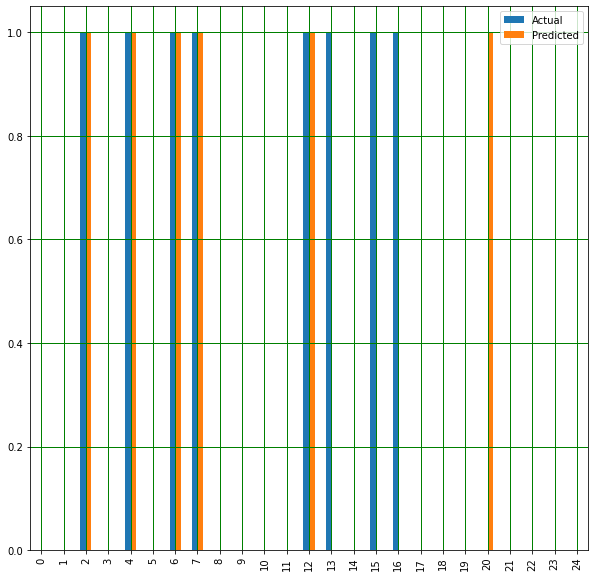

In [31]:
import matplotlib.pyplot as plt

df1 = df.head(25)
df1.plot(kind ='bar', figsize=(10,10))

plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()